In [1]:
import pandas as pd

# Load the Excel file
file_path = "/Users/kassworkin/Library/CloudStorage/OneDrive-UniversityofIllinois-Urbana/CaliHealth/MEPV for AI.xlsx"  # Update with your correct path if needed
df = pd.read_excel(file_path)

# Clean any duplicated columns
df = df.loc[:, ~df.columns.duplicated()]

# Create a new column for decade formatted as strings like "1940s", "1950s"
df['DECADE'] = ((df['YEAR'] // 10) * 10).astype(str) + 's'


# Identify numeric columns to aggregate, excluding unwanted ones
columns_to_exclude = ['YEAR', 'CCODE', 'REGION', 'nREGION', 'DECADE']
columns_to_aggregate = df.select_dtypes(include='number').columns.difference(columns_to_exclude)

# Group by country and decade, and sum the numeric columns
df_decade_agg = df.groupby(['COUNTRY', 'DECADE'])[columns_to_aggregate].sum().reset_index()

# Save the result to a new Excel file
df_decade_agg.to_excel("MEPV_decade_aggregated.xlsx", index=False)

# Display the first few rows to verify
df_decade_agg


,COUNTRY,DECADE,ACTOTAL,CIVTOT,CIVVIOL,CIVWAR,ETHVIOL,ETHWAR,IND,INTIND,...,TOTALAC,TOTCIV,TOTINT,nAC,nBORDER,nCIV,nINT,nRAC,nRCIV,nRINT
0,Afghanistan,1940s,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,...,50.0,49.0,1.0,9.0,15.0,9.0,1.0,12.0,12.0,1.0
1,Afghanistan,1950s,0.0,0.0,0.0,0.0,0.0,0.0,10,0.0,...,57.0,33.0,24.0,11.0,40.0,7.0,6.0,29.0,25.0,10.0
2,Afghanistan,1960s,0.0,0.0,0.0,0.0,0.0,0.0,10,0.0,...,61.0,55.0,6.0,15.0,40.0,13.0,4.0,34.0,33.0,5.0
3,Afghanistan,1970s,14.0,14.0,0.0,14.0,0.0,0.0,10,0.0,...,57.0,51.0,6.0,16.0,39.0,13.0,3.0,45.0,42.0,5.0
4,Afghanistan,1980s,70.0,70.0,0.0,70.0,0.0,0.0,10,0.0,...,178.0,90.0,88.0,36.0,40.0,27.0,21.0,74.0,74.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,Zimbabwe,1970s,26.0,24.0,0.0,0.0,24.0,0.0,10,0.0,...,6.0,1.0,5.0,6.0,35.0,1.0,5.0,22.0,17.0,11.0
1108,Zimbabwe,1980s,7.0,7.0,0.0,0.0,7.0,0.0,10,0.0,...,75.0,75.0,0.0,16.0,40.0,16.0,0.0,38.0,38.0,0.0
1109,Zimbabwe,1990s,0.0,0.0,0.0,0.0,0.0,0.0,10,0.0,...,39.0,39.0,0.0,10.0,40.0,10.0,0.0,32.0,32.0,0.0
1110,Zimbabwe,2000s,0.0,0.0,0.0,0.0,0.0,0.0,10,0.0,...,0.0,0.0,0.0,0.0,40.0,0.0,0.0,18.0,18.0,0.0


## Handling missing values

In [2]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = "/Users/kassworkin/Library/CloudStorage/OneDrive-UniversityofIllinois-Urbana/CaliHealth/MEPV for AI.xlsx"
df = pd.read_excel(file_path)

# Clean any duplicated columns
df = df.loc[:, ~df.columns.duplicated()]

# Create DECADE column (e.g., "1940s", "1950s")
df['DECADE'] = ((df['YEAR'] // 10) * 10).astype(str) + 's'

# Define numeric columns to aggregate
columns_to_exclude = ['YEAR', 'CCODE', 'REGION', 'nREGION', 'DECADE']
columns_to_aggregate = df.select_dtypes(include='number').columns.difference(columns_to_exclude)

# Group by country and decade, summing relevant columns
df_decade_agg = df.groupby(['COUNTRY', 'DECADE'])[columns_to_aggregate].sum().reset_index()

# Generate all combinations of countries and decades
all_countries = df['COUNTRY'].unique()
all_decades = sorted(df['DECADE'].unique(), key=lambda x: int(x[:4]))  # Ensure correct order

# Create full multi-index from country and decade combinations
full_index = pd.MultiIndex.from_product([all_countries, all_decades], names=['COUNTRY', 'DECADE'])

# Reindex the aggregated data to include all combinations, filling missing with NaN
df_decade_complete = df_decade_agg.set_index(['COUNTRY', 'DECADE']).reindex(full_index).reset_index()

# Save the completed dataset to Excel
df_decade_complete.to_excel("MEPV_decade_complete_with_missing.xlsx", index=False)

# Display the first few rows to verify
df_decade_complete


,COUNTRY,DECADE,ACTOTAL,CIVTOT,CIVVIOL,CIVWAR,ETHVIOL,ETHWAR,IND,INTIND,...,TOTALAC,TOTCIV,TOTINT,nAC,nBORDER,nCIV,nINT,nRAC,nRCIV,nRINT
0,Afghanistan,1940s,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,50.0,49.0,1.0,9.0,15.0,9.0,1.0,12.0,12.0,1.0
1,Afghanistan,1950s,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,57.0,33.0,24.0,11.0,40.0,7.0,6.0,29.0,25.0,10.0
2,Afghanistan,1960s,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,61.0,55.0,6.0,15.0,40.0,13.0,4.0,34.0,33.0,5.0
3,Afghanistan,1970s,14.0,14.0,0.0,14.0,0.0,0.0,10.0,0.0,...,57.0,51.0,6.0,16.0,39.0,13.0,3.0,45.0,42.0,5.0
4,Afghanistan,1980s,70.0,70.0,0.0,70.0,0.0,0.0,10.0,0.0,...,178.0,90.0,88.0,36.0,40.0,27.0,21.0,74.0,74.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,Zimbabwe,1970s,26.0,24.0,0.0,0.0,24.0,0.0,10.0,0.0,...,6.0,1.0,5.0,6.0,35.0,1.0,5.0,22.0,17.0,11.0
1452,Zimbabwe,1980s,7.0,7.0,0.0,0.0,7.0,0.0,10.0,0.0,...,75.0,75.0,0.0,16.0,40.0,16.0,0.0,38.0,38.0,0.0
1453,Zimbabwe,1990s,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,39.0,39.0,0.0,10.0,40.0,10.0,0.0,32.0,32.0,0.0
1454,Zimbabwe,2000s,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,40.0,0.0,0.0,18.0,18.0,0.0


In [3]:
df_decade_complete[df_decade_complete['COUNTRY']=='Angola']

,COUNTRY,DECADE,ACTOTAL,CIVTOT,CIVVIOL,CIVWAR,ETHVIOL,ETHWAR,IND,INTIND,...,TOTALAC,TOTCIV,TOTINT,nAC,nBORDER,nCIV,nINT,nRAC,nRCIV,nRINT
24,Angola,1940s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Angola,1950s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Angola,1960s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,Angola,1970s,37.0,35.0,5.0,30.0,0.0,0.0,5.0,20.0,...,8.0,6.0,2.0,3.0,15.0,3.0,2.0,19.0,14.0,11.0
28,Angola,1980s,70.0,70.0,10.0,60.0,0.0,0.0,10.0,0.0,...,9.0,9.0,0.0,5.0,30.0,5.0,0.0,38.0,38.0,0.0
29,Angola,1990s,70.0,70.0,10.0,60.0,0.0,0.0,10.0,0.0,...,40.0,40.0,0.0,12.0,40.0,12.0,0.0,32.0,32.0,0.0
30,Angola,2000s,24.0,24.0,6.0,18.0,0.0,0.0,10.0,0.0,...,52.0,52.0,0.0,12.0,40.0,12.0,0.0,18.0,18.0,0.0
31,Angola,2010s,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,15.0,15.0,0.0,3.0,12.0,3.0,0.0,3.0,3.0,0.0


In [5]:
import pandas as pd

# Define your function to categorize violence levels
def recode_violence(value):
    if value == 0:
        return "No Violence"
    elif 1 <= value <= 10:
        return "Sporadic Violence"
    elif 11 <= value <= 20:
        return "Limited Violence"
    elif 21 <= value <= 30:
        return "Serious Violence"
    elif 31 <= value <= 40:
        return "Serious Warfare"
    elif 41 <= value <= 50:
        return "Prolonged Warfare"
    elif 51 <= value <= 60:
        return "Extensive Warfare"
    elif 61 <= value <= 70:
        return "Pervasive Warfare"
    elif 71 <= value <= 80:
        return "Technological Warfare"
    elif 81 <= value <= 90:
        return "Total Warfare"
    elif 91 <= value <= 100:
        return "Annihilation"
    else:
        return "NaN"

# List the columns you want to recode
columns_to_recode = ['CIVTOT', 'INTTOT', 'ACTOTAL']  # Replace with your actual column names

# Apply the function to each relevant column
for col in columns_to_recode:
    df_decade_complete[col + 'CIVTOT'] = df_decade_complete[col].apply(recode_violence)

# Preview result
df_decade_complete[[*columns_to_recode, *(col + '' for col in columns_to_recode)]]

df_decade_complete

,COUNTRY,DECADE,ACTOTAL,CIVTOT,CIVVIOL,CIVWAR,ETHVIOL,ETHWAR,IND,INTIND,...,nAC,nBORDER,nCIV,nINT,nRAC,nRCIV,nRINT,CIVTOTCIVTOT,INTTOTCIVTOT,ACTOTALCIVTOT
0,Afghanistan,1940s,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,9.0,15.0,9.0,1.0,12.0,12.0,1.0,No Violence,No Violence,No Violence
1,Afghanistan,1950s,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,11.0,40.0,7.0,6.0,29.0,25.0,10.0,No Violence,No Violence,No Violence
2,Afghanistan,1960s,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,15.0,40.0,13.0,4.0,34.0,33.0,5.0,No Violence,No Violence,No Violence
3,Afghanistan,1970s,14.0,14.0,0.0,14.0,0.0,0.0,10.0,0.0,...,16.0,39.0,13.0,3.0,45.0,42.0,5.0,Limited Violence,No Violence,Limited Violence
4,Afghanistan,1980s,70.0,70.0,0.0,70.0,0.0,0.0,10.0,0.0,...,36.0,40.0,27.0,21.0,74.0,74.0,12.0,Pervasive Warfare,No Violence,Pervasive Warfare
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,Zimbabwe,1970s,26.0,24.0,0.0,0.0,24.0,0.0,10.0,0.0,...,6.0,35.0,1.0,5.0,22.0,17.0,11.0,Serious Violence,Sporadic Violence,Serious Violence
1452,Zimbabwe,1980s,7.0,7.0,0.0,0.0,7.0,0.0,10.0,0.0,...,16.0,40.0,16.0,0.0,38.0,38.0,0.0,Sporadic Violence,No Violence,Sporadic Violence
1453,Zimbabwe,1990s,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,10.0,40.0,10.0,0.0,32.0,32.0,0.0,No Violence,No Violence,No Violence
1454,Zimbabwe,2000s,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,40.0,0.0,0.0,18.0,18.0,0.0,No Violence,No Violence,No Violence


In [6]:
df_decade_complete.rename(columns={'CIVTOTCIVTOT': 'CIVTOT_CAT'}, inplace=True)
df_decade_complete.rename(columns={'INTTOTCIVTOT': 'INTTOT_CAT'}, inplace=True)
df_decade_complete.rename(columns={'ACTOTCATCIVTOT': 'ACTOT_CAT'}, inplace=True)
df_decade_complete

,COUNTRY,DECADE,ACTOTAL,CIVTOT,CIVVIOL,CIVWAR,ETHVIOL,ETHWAR,IND,INTIND,...,nAC,nBORDER,nCIV,nINT,nRAC,nRCIV,nRINT,CIVTOT_CAT,INTTOT_CAT,ACTOTALCIVTOT
0,Afghanistan,1940s,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,9.0,15.0,9.0,1.0,12.0,12.0,1.0,No Violence,No Violence,No Violence
1,Afghanistan,1950s,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,11.0,40.0,7.0,6.0,29.0,25.0,10.0,No Violence,No Violence,No Violence
2,Afghanistan,1960s,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,15.0,40.0,13.0,4.0,34.0,33.0,5.0,No Violence,No Violence,No Violence
3,Afghanistan,1970s,14.0,14.0,0.0,14.0,0.0,0.0,10.0,0.0,...,16.0,39.0,13.0,3.0,45.0,42.0,5.0,Limited Violence,No Violence,Limited Violence
4,Afghanistan,1980s,70.0,70.0,0.0,70.0,0.0,0.0,10.0,0.0,...,36.0,40.0,27.0,21.0,74.0,74.0,12.0,Pervasive Warfare,No Violence,Pervasive Warfare
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,Zimbabwe,1970s,26.0,24.0,0.0,0.0,24.0,0.0,10.0,0.0,...,6.0,35.0,1.0,5.0,22.0,17.0,11.0,Serious Violence,Sporadic Violence,Serious Violence
1452,Zimbabwe,1980s,7.0,7.0,0.0,0.0,7.0,0.0,10.0,0.0,...,16.0,40.0,16.0,0.0,38.0,38.0,0.0,Sporadic Violence,No Violence,Sporadic Violence
1453,Zimbabwe,1990s,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,10.0,40.0,10.0,0.0,32.0,32.0,0.0,No Violence,No Violence,No Violence
1454,Zimbabwe,2000s,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,40.0,0.0,0.0,18.0,18.0,0.0,No Violence,No Violence,No Violence


In [7]:
df_decade_complete[df_decade_complete['COUNTRY']=='Angola']

,COUNTRY,DECADE,ACTOTAL,CIVTOT,CIVVIOL,CIVWAR,ETHVIOL,ETHWAR,IND,INTIND,...,nAC,nBORDER,nCIV,nINT,nRAC,nRCIV,nRINT,CIVTOT_CAT,INTTOT_CAT,ACTOTALCIVTOT
24,Angola,1940s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Angola,1950s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Angola,1960s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Violence,No Violence,No Violence
27,Angola,1970s,37.0,35.0,5.0,30.0,0.0,0.0,5.0,20.0,...,3.0,15.0,3.0,2.0,19.0,14.0,11.0,Serious Warfare,Sporadic Violence,Serious Warfare
28,Angola,1980s,70.0,70.0,10.0,60.0,0.0,0.0,10.0,0.0,...,5.0,30.0,5.0,0.0,38.0,38.0,0.0,Pervasive Warfare,No Violence,Pervasive Warfare
29,Angola,1990s,70.0,70.0,10.0,60.0,0.0,0.0,10.0,0.0,...,12.0,40.0,12.0,0.0,32.0,32.0,0.0,Pervasive Warfare,No Violence,Pervasive Warfare
30,Angola,2000s,24.0,24.0,6.0,18.0,0.0,0.0,10.0,0.0,...,12.0,40.0,12.0,0.0,18.0,18.0,0.0,Serious Violence,No Violence,Serious Violence
31,Angola,2010s,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,3.0,12.0,3.0,0.0,3.0,3.0,0.0,No Violence,No Violence,No Violence


In [8]:
# List the columns you want to keep
selected_columns = ['COUNTRY', 'DECADE', 'CIVTOT_CAT', 'INTTOT_CAT', 'ACTOTALCIVTOT']

# Create the subset DataFrame
subset_df = df_decade_complete[selected_columns]

# Preview the result
subset_df


,COUNTRY,DECADE,CIVTOT_CAT,INTTOT_CAT,ACTOTALCIVTOT
0,Afghanistan,1940s,No Violence,No Violence,No Violence
1,Afghanistan,1950s,No Violence,No Violence,No Violence
2,Afghanistan,1960s,No Violence,No Violence,No Violence
3,Afghanistan,1970s,Limited Violence,No Violence,Limited Violence
4,Afghanistan,1980s,Pervasive Warfare,No Violence,Pervasive Warfare
...,...,...,...,...,...
1451,Zimbabwe,1970s,Serious Violence,Sporadic Violence,Serious Violence
1452,Zimbabwe,1980s,Sporadic Violence,No Violence,Sporadic Violence
1453,Zimbabwe,1990s,No Violence,No Violence,No Violence
1454,Zimbabwe,2000s,No Violence,No Violence,No Violence


In [9]:
subset_df[subset_df['COUNTRY']=='Angola']

,COUNTRY,DECADE,CIVTOT_CAT,INTTOT_CAT,ACTOTALCIVTOT
24,Angola,1940s,NaN,NaN,NaN
25,Angola,1950s,NaN,NaN,NaN
26,Angola,1960s,No Violence,No Violence,No Violence
27,Angola,1970s,Serious Warfare,Sporadic Violence,Serious Warfare
28,Angola,1980s,Pervasive Warfare,No Violence,Pervasive Warfare
29,Angola,1990s,Pervasive Warfare,No Violence,Pervasive Warfare
30,Angola,2000s,Serious Violence,No Violence,Serious Violence
31,Angola,2010s,No Violence,No Violence,No Violence


In [10]:
subset_df.to_csv('subset_df.csv', index=False)

In [11]:
import pandas as pd
from sequenzo import *

subset_df = pd.read_csv('subset_df.csv')
subset_df

,COUNTRY,DECADE,CIVTOT_CAT,INTTOT_CAT,ACTOTALCIVTOT
0,Afghanistan,1940s,No Violence,No Violence,No Violence
1,Afghanistan,1950s,No Violence,No Violence,No Violence
2,Afghanistan,1960s,No Violence,No Violence,No Violence
3,Afghanistan,1970s,Limited Violence,No Violence,Limited Violence
4,Afghanistan,1980s,Pervasive Warfare,No Violence,Pervasive Warfare
...,...,...,...,...,...
1451,Zimbabwe,1970s,Serious Violence,Sporadic Violence,Serious Violence
1452,Zimbabwe,1980s,Sporadic Violence,No Violence,Sporadic Violence
1453,Zimbabwe,1990s,No Violence,No Violence,No Violence
1454,Zimbabwe,2000s,No Violence,No Violence,No Violence


In [14]:
wide_inter_df = long_to_wide_format_data(subset_df,
                                         id_col='COUNTRY',
                                         time_col='DECADE',
                                         value_col='INTTOT_CAT')
wide_inter_df

wide_civil_df = long_to_wide_format_data(subset_df,
                                         id_col='COUNTRY',
                                         time_col='DECADE',
                                         value_col='CIVTOT_CAT')
wide_inter_df

,COUNTRY,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s
0,Afghanistan,No Violence,No Violence,No Violence,No Violence,No Violence,No Violence,Serious Violence,Sporadic Violence
1,Albania,No Violence,No Violence,No Violence,No Violence,No Violence,No Violence,No Violence,No Violence
2,Algeria,No Violence,No Violence,Sporadic Violence,No Violence,No Violence,No Violence,No Violence,No Violence
3,Angola,NaN,NaN,No Violence,Sporadic Violence,No Violence,No Violence,No Violence,No Violence
4,Argentina,No Violence,No Violence,No Violence,No Violence,Sporadic Violence,No Violence,No Violence,No Violence
...,...,...,...,...,...,...,...,...,...
177,"Yemen, North",NaN,No Violence,No Violence,Sporadic Violence,No Violence,No Violence,NaN,NaN
178,"Yemen, South",NaN,NaN,No Violence,Sporadic Violence,No Violence,NaN,NaN,NaN
179,Yugoslavia,No Violence,No Violence,No Violence,No Violence,No Violence,No Violence,NaN,NaN
180,Zambia,NaN,NaN,No Violence,No Violence,No Violence,No Violence,No Violence,No Violence


In [15]:
#SAVE CSV
wide_inter_df.to_csv('wide_inter_final_df.csv', index=False)
wide_civil_df.to_csv('wide_civil_final_df.csv', index=False)

🔍 Missing Value Summary
----------------------------------------
[Columns with Missing Values]
       Missing Count  Missing (%)
1940s            101        55.49
1950s             82        45.05
1960s             46        25.27
1980s             37        20.33
1970s             34        18.68
2000s             16         8.79
2010s             15         8.24
1990s             13         7.14

[Top 5 Rows with Most Missing Values]
     Missing Count
171              7
142              7
172              7
146              7
66               6


<Figure size 1000x500 with 0 Axes>

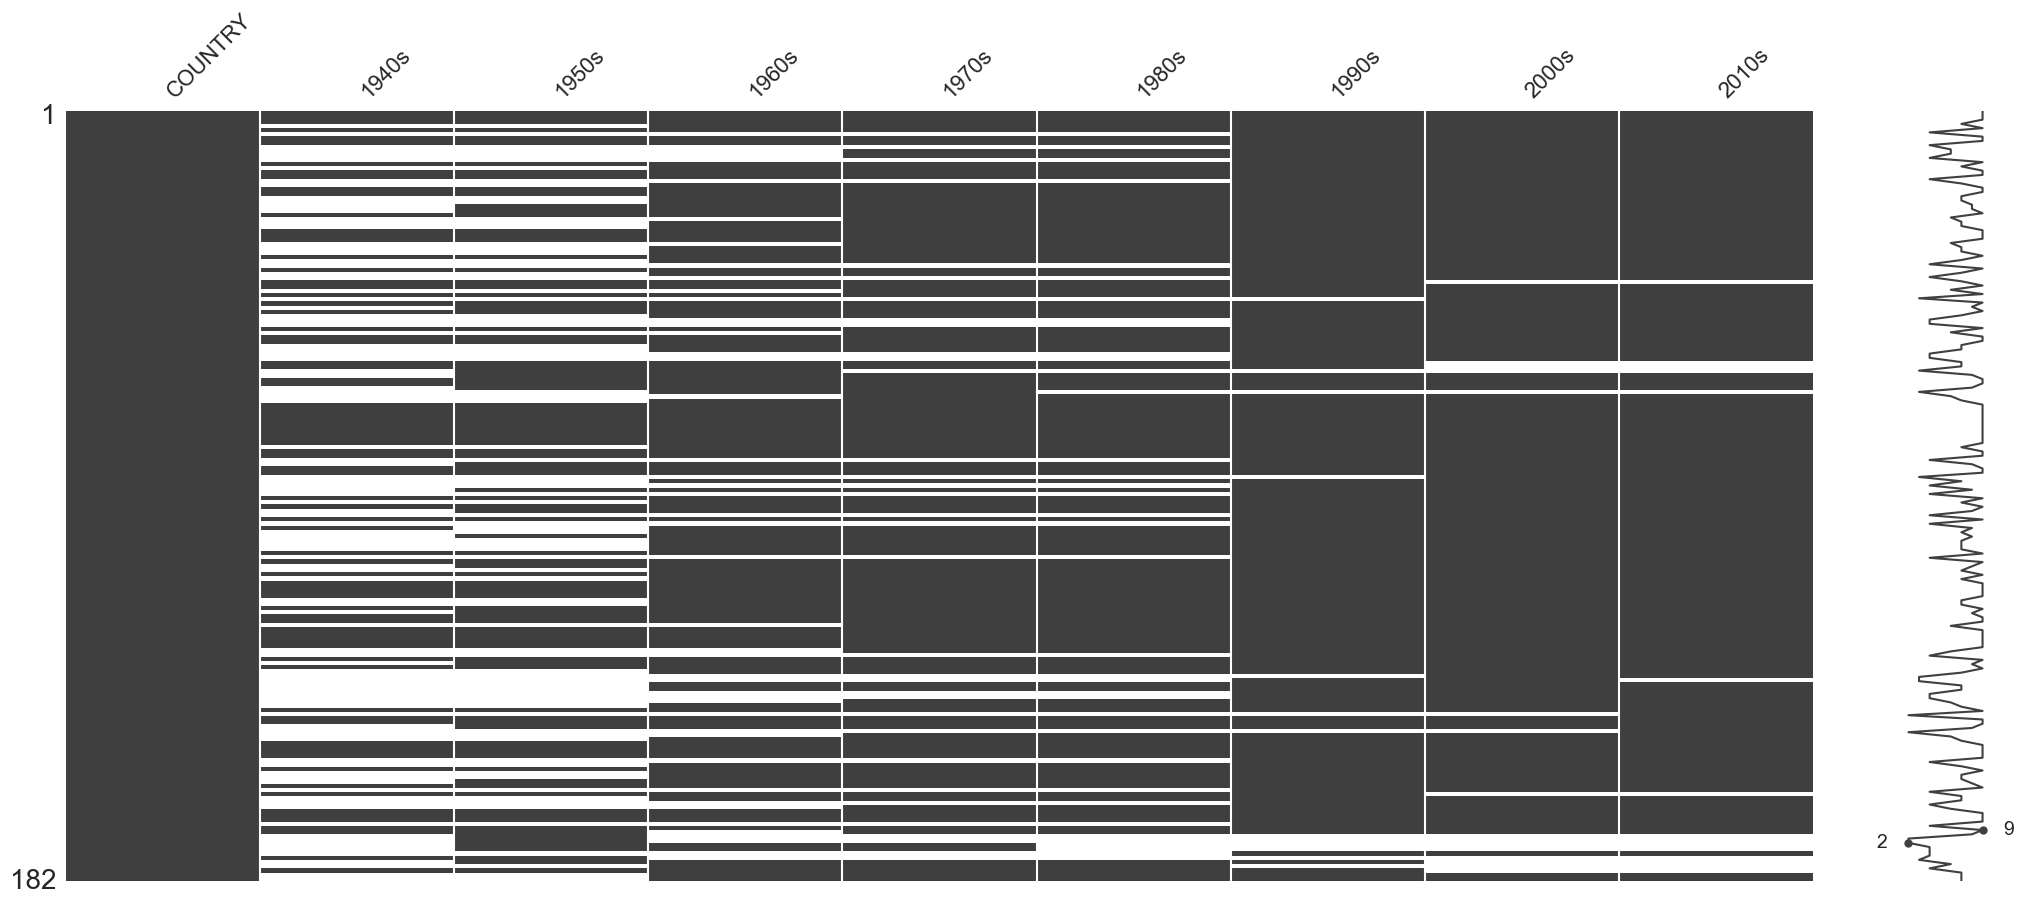

In [16]:
summarize_missing_values(wide_civil_df)

In [17]:
# Define the columns representing time (decades)
time_cols = ['1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

# Define all possible state categories in the sequence
state_labels = [
    "No Violence", "Sporadic Violence", "Limited Violence", "Serious Violence",
    "Serious Warfare", "Prolonged Warfare", "Extensive Warfare", "Pervasive Warfare",
    "Technological Warfare", "Total Warfare"
]

# Assuming 'wide_civil_df' is a DataFrame where each row is a country and each column a decade
print("\n------ wide_civil_df ------")
wide_civil_seq = SequenceData(
    data=wide_civil_df,  # Subset only the decade columns
    time_type="year",
    time=time_cols,
    states=state_labels,
    labels=state_labels,
    id_col='COUNTRY',
)

# Assuming 'wide_inter_df' has the same format but for a different type of violence
print("\n------ wide_inter_df ------")
wide_inter_seq = SequenceData(
    data=wide_inter_df,  # Again, subset only the decade columns
    time_type="year",
    time=time_cols,
    states=['Extensive Warfare', 'Limited Violence', 'No Violence', 'Prolonged Warfare', 'Serious Violence', 'Serious Warfare', 'Sporadic Violence'],
    labels=['Extensive Warfare', 'Limited Violence', 'No Violence', 'Prolonged Warfare', 'Serious Violence', 'Serious Warfare', 'Sporadic Violence'],
    id_col='COUNTRY',
)



------ wide_civil_df ------
[!] Detected missing values (empty cells) in the sequence data.
    → Automatically added 'Missing' to `states` and `labels` for compatibility.
    However, it's strongly recommended to manually include it when defining `states` and `labels`.
    For example:

        states = ['At Home', 'Left Home', 'Missing']
        labels = ['At Home', 'Left Home', 'Missing']

    This ensures consistent color mapping and avoids unexpected visualization errors.

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 182
[>] Number of time points: 8
[>] Min/Max sequence length: 1 / 8
[>] There are 344 missing values across 109 sequences.
    First few missing sequence IDs: ['Angola', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Benin', 'Bosnia and Herzegovina', 'Botswana', 'Burkina Faso'] ...
[>] Top sequences with the most missing time points:
    (Each row shows a sequence ID and its number of missing values)

          

In [18]:
wide_civil_df.columns

Index(['COUNTRY', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s',
       '2000s', '2010s'],
      dtype='object')

In [20]:
import numpy as np
from sequenzo import SequenceData

def fix_matrix(mat):
    """Shift –1 padding → 0 and 0‑based codes → 1‑based."""
    mat = mat.copy()
    mat[mat == -1] = 0          # missing
    mat[mat > 0]   += 1         # states now 1..k
    return mat

# --- repair the two domains ---
civil_fixed = fix_matrix(wide_civil_seq.data)
inter_fixed = fix_matrix(wide_inter_seq.data)

# Re‑instantiate SequenceData with correct labels
labels_civil = list(codebook_civil.values())       # or however you stored them
labels_inter = list(codebook_inter.values())

wide_civil_seq = SequenceData(civil_fixed, state_labels=labels_civil)
wide_inter_seq = SequenceData(inter_fixed, state_labels=labels_inter)

# Now the association call should work
result = get_association_between_domains(
    [wide_civil_seq, wide_inter_seq],
    assoc=["V", "LRT"],
    rep_method="overall"
)
print(result)


TypeError: '>' not supported between instances of 'str' and 'int'

In [19]:
# Now call get_association_between_domains with the correct objects
result = get_association_between_domains(
    [wide_civil_seq, wide_inter_seq],  # both must be SequenceData objects
    assoc=["V", "LRT"],
    rep_method="overall"
)

IndexError: index 10 is out of bounds for axis 0 with size 10

In [19]:
sequence_data = [wide_civil_seq, wide_inter_seq]

cat_distance_matrix = compute_cat_distance_matrix(sequence_data, method="OM", sm=["CONSTANT"], indel=[1, 1], what="diss", link="sum")

cat_distance_matrix

[>] 2 domains with 182 sequences.
[>] Building MD sequences of combined states.
  - OK.
[>] Including missing value as an additional state.
[>] Computing substitution cost matrix for domain 0.
[>] Including missing value as an additional state.
[>] Computing substitution cost matrix for domain 1.
[>] Computing MD substitution and indel costs with additive trick.
  - OK.
[>] Computing MD distances using additive trick.
  - OK.


,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Vietnam South,"Vietnam, North","Vietnam, South",Yemen,Yemen North,"Yemen, North","Yemen, South",Yugoslavia,Zambia,Zimbabwe
Afghanistan,0.0,20.0,16.0,20.0,18.0,22.0,20.0,20.0,24.0,20.0,...,28.0,22.0,22.0,32.0,28.0,20.0,26.0,20.0,20.0,20.0
Albania,20.0,0.0,12.0,22.0,12.0,22.0,4.0,4.0,22.0,12.0,...,26.0,30.0,30.0,28.0,24.0,14.0,24.0,8.0,12.0,16.0
Algeria,16.0,12.0,0.0,24.0,8.0,22.0,12.0,12.0,22.0,12.0,...,28.0,28.0,28.0,32.0,28.0,14.0,24.0,12.0,12.0,14.0
Angola,20.0,22.0,24.0,0.0,22.0,16.0,24.0,24.0,16.0,16.0,...,22.0,22.0,22.0,20.0,22.0,20.0,18.0,24.0,16.0,14.0
Argentina,18.0,12.0,8.0,22.0,0.0,20.0,12.0,12.0,20.0,12.0,...,26.0,26.0,26.0,28.0,24.0,14.0,22.0,12.0,12.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yemen, North",20.0,14.0,14.0,20.0,14.0,18.0,16.0,16.0,18.0,12.0,...,16.0,20.0,20.0,20.0,18.0,0.0,14.0,8.0,12.0,12.0
"Yemen, South",26.0,24.0,24.0,18.0,22.0,12.0,28.0,28.0,12.0,20.0,...,10.0,12.0,12.0,12.0,10.0,14.0,0.0,20.0,20.0,14.0
Yugoslavia,20.0,8.0,12.0,24.0,12.0,22.0,8.0,8.0,24.0,12.0,...,20.0,24.0,24.0,24.0,20.0,8.0,20.0,0.0,12.0,16.0
Zambia,20.0,12.0,12.0,16.0,12.0,12.0,12.0,12.0,14.0,2.0,...,22.0,22.0,22.0,20.0,22.0,12.0,20.0,12.0,0.0,8.0


[>] Converting DataFrame to NumPy array...


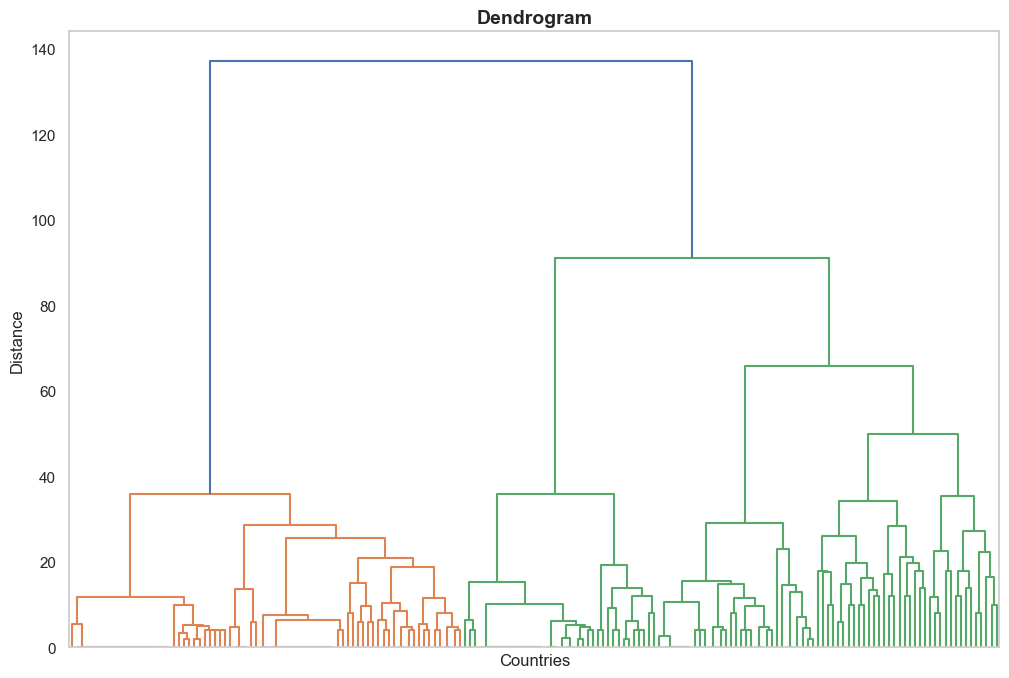

<Figure size 640x480 with 0 Axes>

In [27]:
cluster = Cluster(cat_distance_matrix, wide_inter_df.COUNTRY, clustering_method='ward')
cluster.plot_dendrogram(xlabel="Countries", ylabel="Distance")


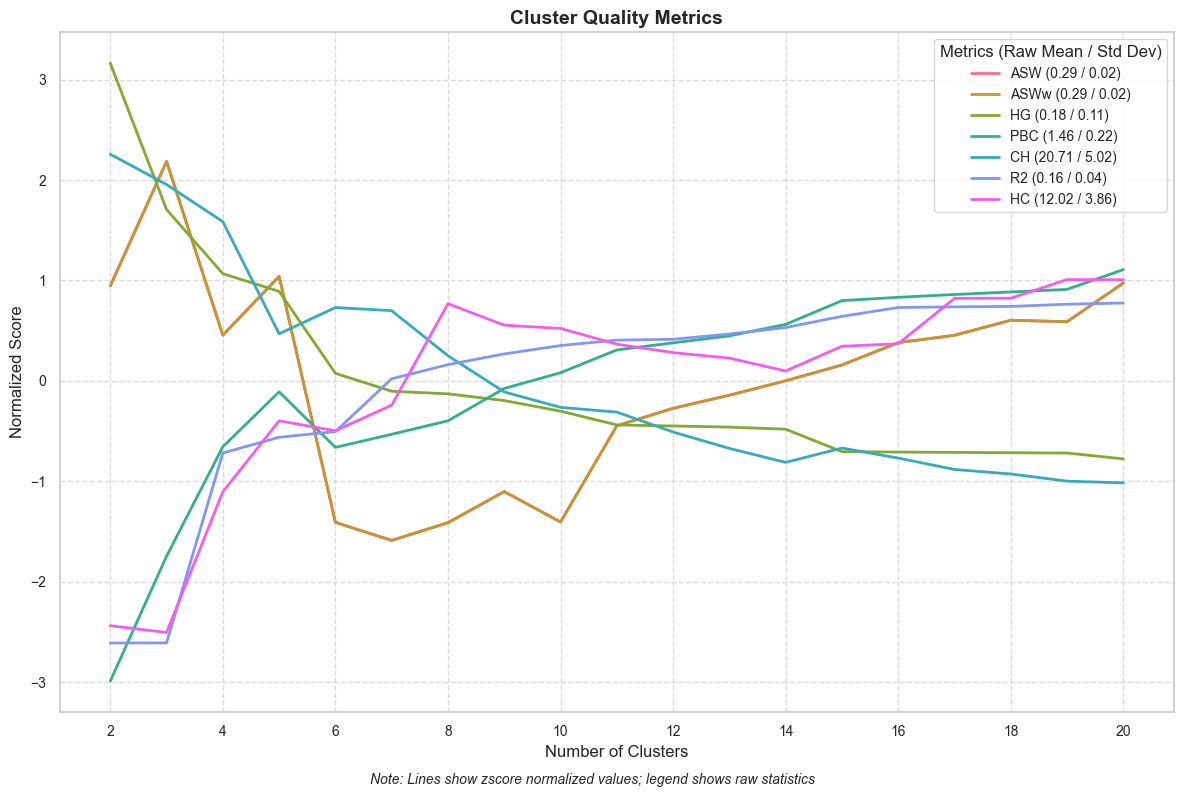

  Metric  Opt. Clusters  Opt. Value  Z-Score Norm.  Min-Max Norm.
0    ASW              3    2.185961       2.185961            1.0
1   ASWw              3    2.185961       2.185961            1.0
2     HG              2    3.163715       3.163715            1.0
3    PBC             20    1.108227       1.108227            1.0
4     CH              2    2.257238       2.257238            1.0
5     R2             20    0.775712       0.775712            1.0
6     HC             19    1.008708       1.008708            1.0


<Figure size 640x480 with 0 Axes>

In [28]:
# Create a ClusterQuality object to evaluate clustering quality
cluster_quality = ClusterQuality(cluster)
cluster_quality.compute_cluster_quality_scores()
cluster_quality.plot_combined_scores(norm='zscore', save_as='combined_scores')
summary_table = cluster_quality.get_metrics_table()
print(summary_table)

        Entity ID  Cluster ID
0     Afghanistan           3
1         Albania           1
2         Algeria           1
3          Angola           3
4       Argentina           1
..            ...         ...
177  Yemen, North           1
178  Yemen, South           2
179    Yugoslavia           1
180        Zambia           3
181      Zimbabwe           3

[182 rows x 2 columns]
   Cluster  Count  Percentage
0        1     77       42.31
1        2     38       20.88
2        3     67       36.81


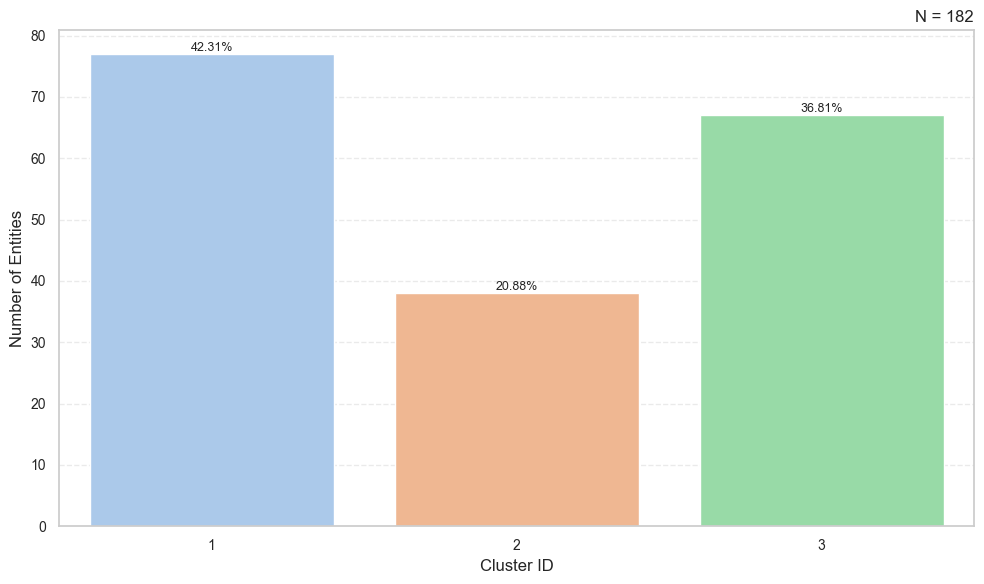

<Figure size 640x480 with 0 Axes>

In [36]:
cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=3)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=3)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=3, save_as="distribution.png", title=None)

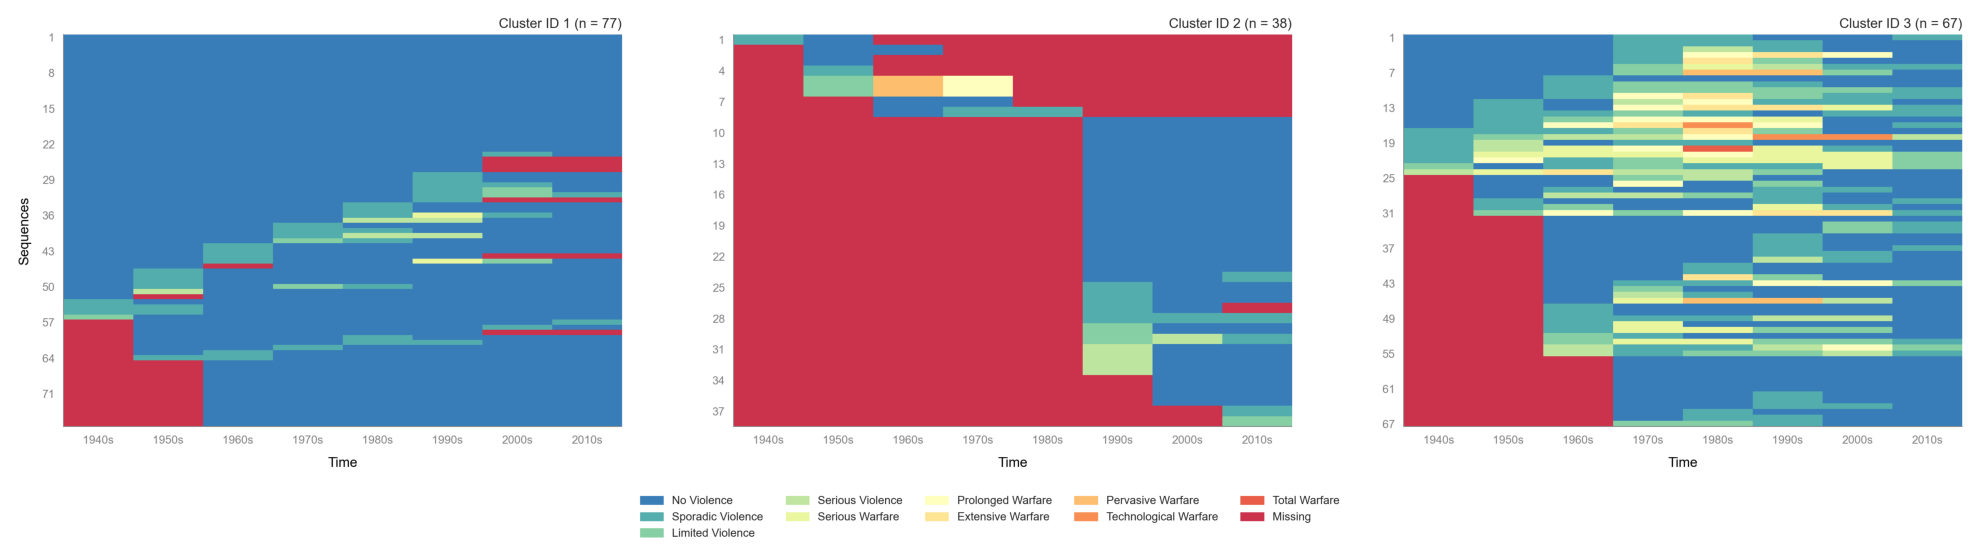

In [37]:
plot_sequence_index(seqdata=wide_civil_seq,
                    id_group_df=membership_table,
                    categories='Cluster ID',
                    save_as='cluster_index_plot')

In [58]:
# Replace all NaN values in the DataFrame with the string "missing"
# wide_civil_df_nan_to_missing = wide_civil_df.fillna("Missing")

violence_colors = [
    '#c6dbef',  # No Violence – light blue
    '#9ecae1',  # Sporadic Violence – sky blue
    '#6baed6',  # Limited Violence – mid blue
    '#fdcc8a',  # Serious Violence – soft orange
    '#fc8d59',  # Serious Warfare – salmon
    '#e34a33',  # Prolonged Warfare – reddish orange
    '#bd0026',  # Extensive Warfare – dark red
    '#800026',  # Pervasive Warfare – deep red
    '#807dba',  # Technological Warfare – muted purple
    '#54278f',  # Total Warfare – deep purple
    '#f0f0f0'   # Missing – light gray
]

import numpy as np

violence_states = [
    "No Violence",
    "Sporadic Violence",
    "Limited Violence",
    "Serious Violence",
    "Serious Warfare",
    "Prolonged Warfare",
    "Extensive Warfare",
    "Pervasive Warfare",
    "Technological Warfare",
    "Total Warfare",
    "missing"
]

In [59]:
violence_sequence = SequenceData(data=wide_civil_df_nan_to_missing,
                                  time_type='year',
                                  time= ['1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'],
                                  states=violence_states,
                                  custom_colors=violence_colors,
                                  id_col='COUNTRY')


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 182
[>] Number of time points: 8
[>] Min/Max sequence length: 8 / 8
[>] States: ['No Violence', 'Sporadic Violence', 'Limited Violence', 'Serious Violence', 'Serious Warfare', 'Prolonged Warfare', 'Extensive Warfare', 'Pervasive Warfare', 'Technological Warfare', 'Total Warfare', 'missing']


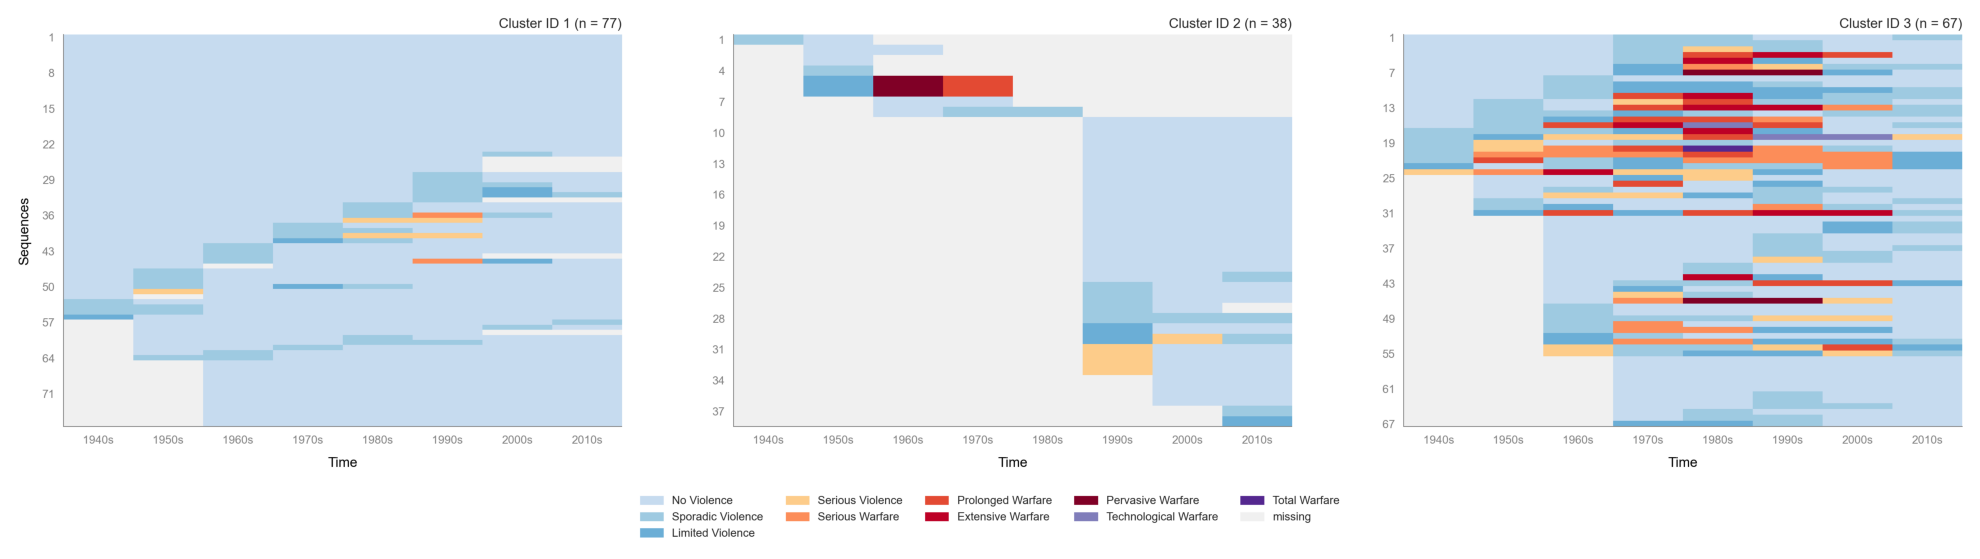

In [62]:
plot_sequence_index(seqdata=violence_sequence,
                            id_group_df=membership_table,
                            categories='Cluster ID',
                            save_as='cluster_index_civviol_plot')

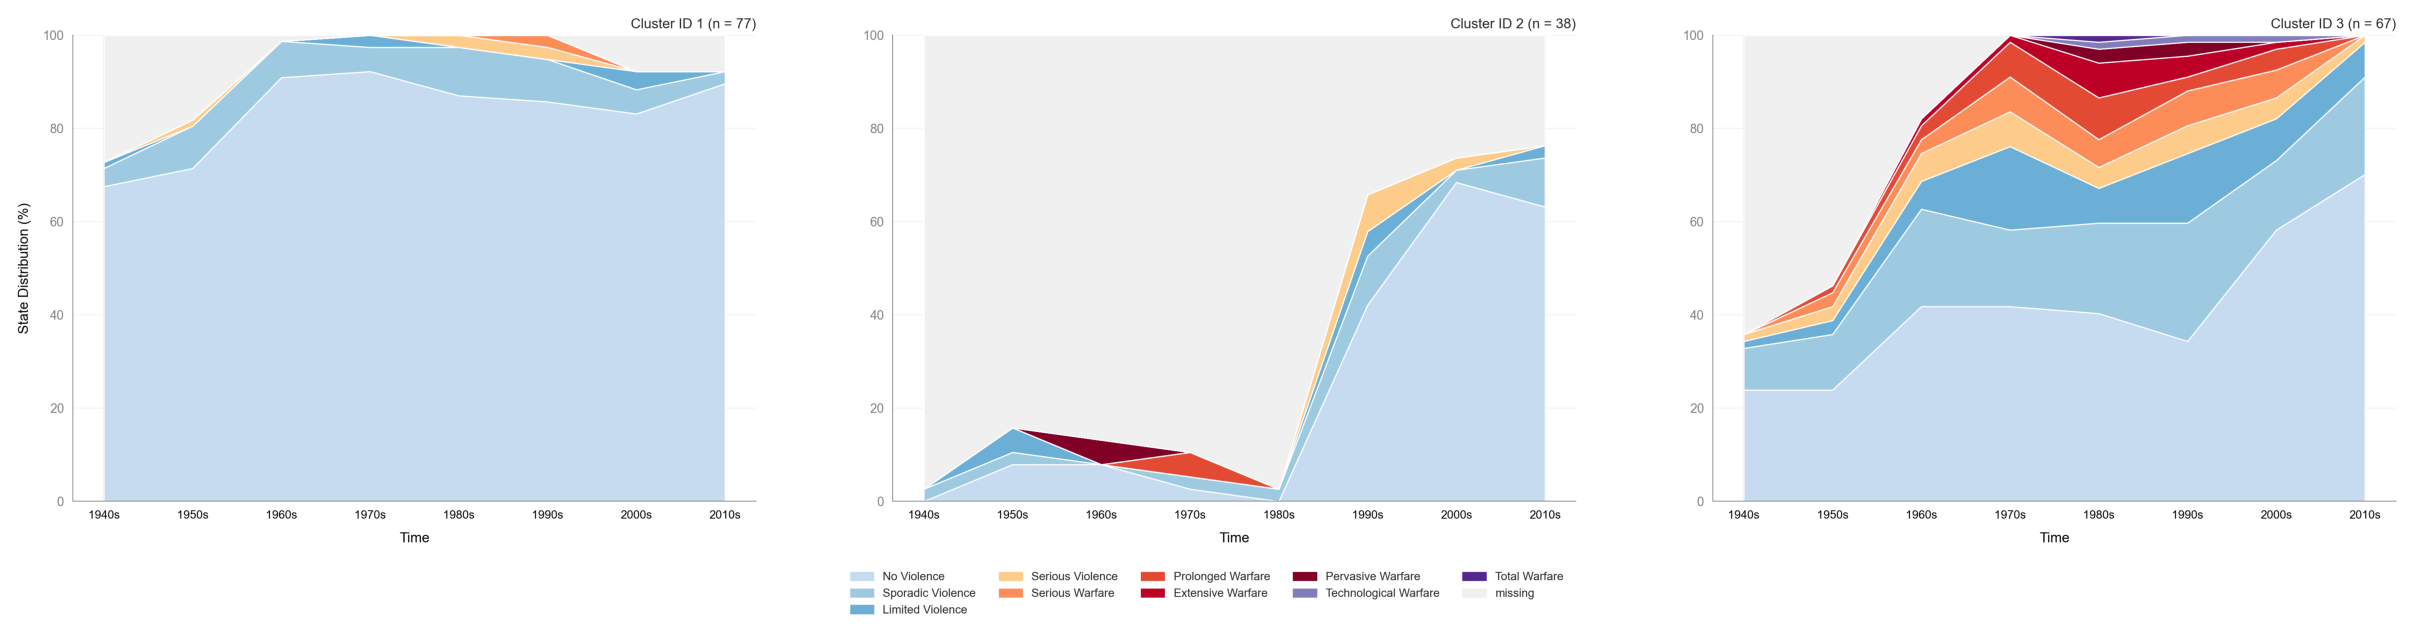

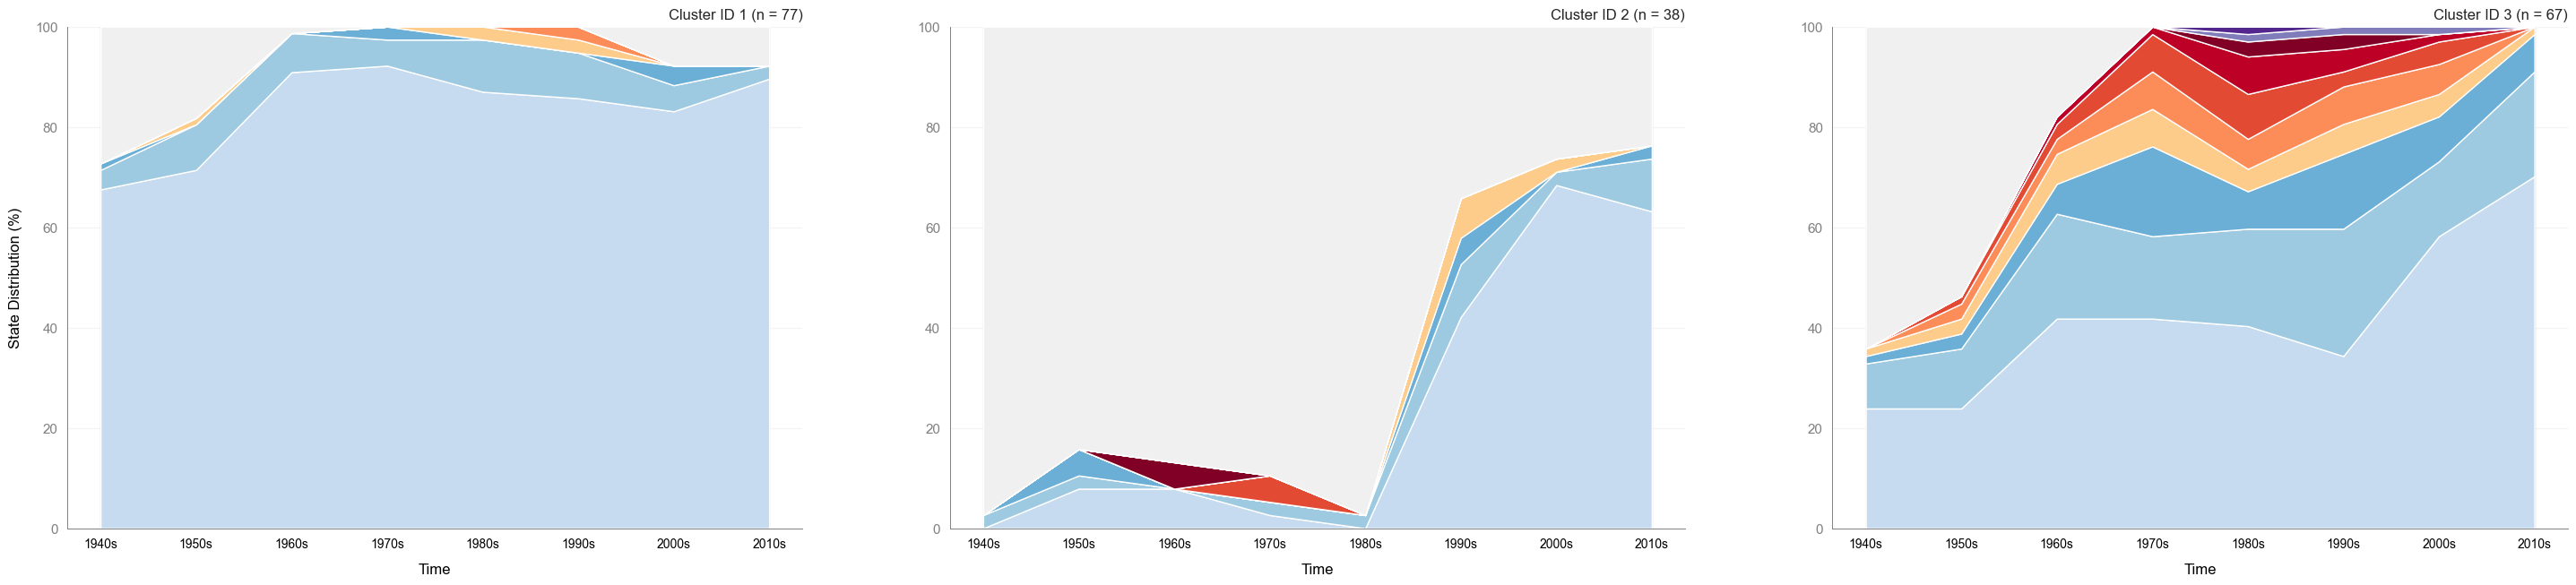

In [64]:
plot_state_distribution(seqdata=violence_sequence,
                            id_group_df=membership_table,
                            categories='Cluster ID',
                            save_as='cluster_state_distribution_civviol_plot')

[>] Converting DataFrame to NumPy array...


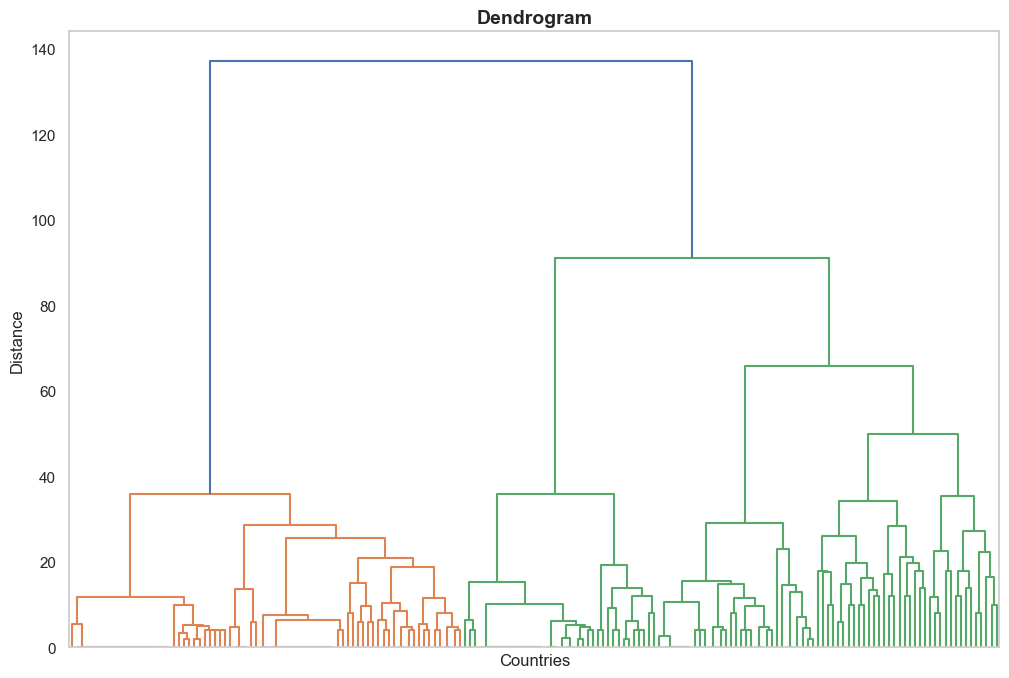

<Figure size 640x480 with 0 Axes>

In [65]:
wide_civil_df = long_to_wide_format_data(subset_df,
                                         id_col='COUNTRY',
                                         time_col='DECADE',
                                         value_col='CIVTOT_CAT')
wide_civil_df

cluster = Cluster(cat_distance_matrix, wide_civil_df.COUNTRY, clustering_method='ward')
cluster.plot_dendrogram(xlabel="Countries", ylabel="Distance")

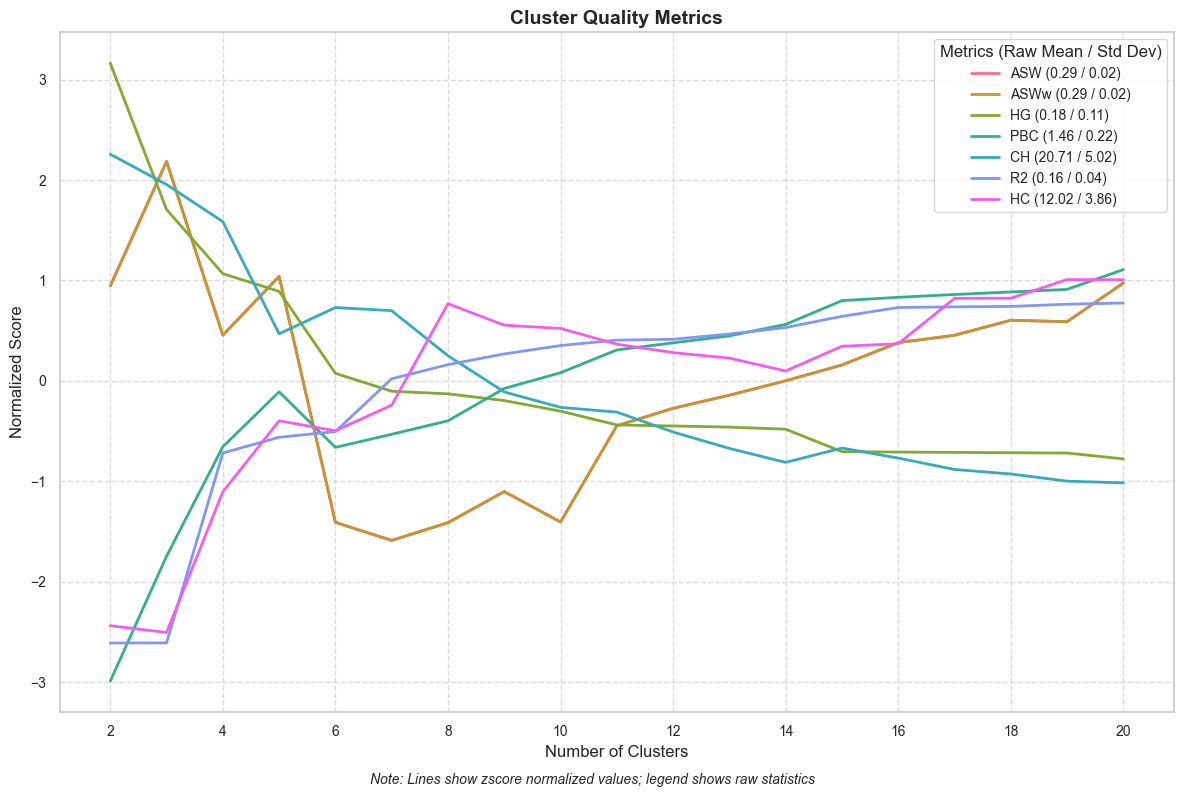

  Metric  Opt. Clusters  Opt. Value  Z-Score Norm.  Min-Max Norm.
0    ASW              3    2.185961       2.185961            1.0
1   ASWw              3    2.185961       2.185961            1.0
2     HG              2    3.163715       3.163715            1.0
3    PBC             20    1.108227       1.108227            1.0
4     CH              2    2.257238       2.257238            1.0
5     R2             20    0.775712       0.775712            1.0
6     HC             19    1.008708       1.008708            1.0


<Figure size 640x480 with 0 Axes>

In [71]:
# Create a ClusterQuality object to evaluate clustering quality
cluster_quality = ClusterQuality(cluster)
cluster_quality.compute_cluster_quality_scores()
cluster_quality.plot_combined_scores(norm='zscore', save_as='combined_scores')
summary_table = cluster_quality.get_metrics_table()
print(summary_table)

        Entity ID  Cluster ID
0     Afghanistan           3
1         Albania           1
2         Algeria           1
3          Angola           3
4       Argentina           1
..            ...         ...
177  Yemen, North           1
178  Yemen, South           2
179    Yugoslavia           1
180        Zambia           3
181      Zimbabwe           3

[182 rows x 2 columns]
   Cluster  Count  Percentage
0        1     77       42.31
1        2     38       20.88
2        3     67       36.81


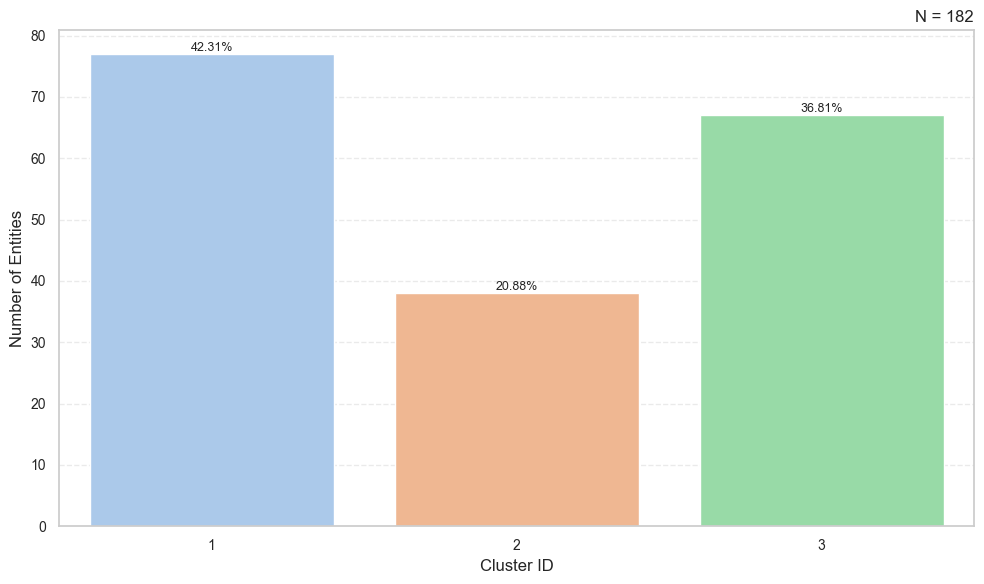

<Figure size 640x480 with 0 Axes>

In [72]:
cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=3)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=3)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=3, save_as="distribution.png", title=None)

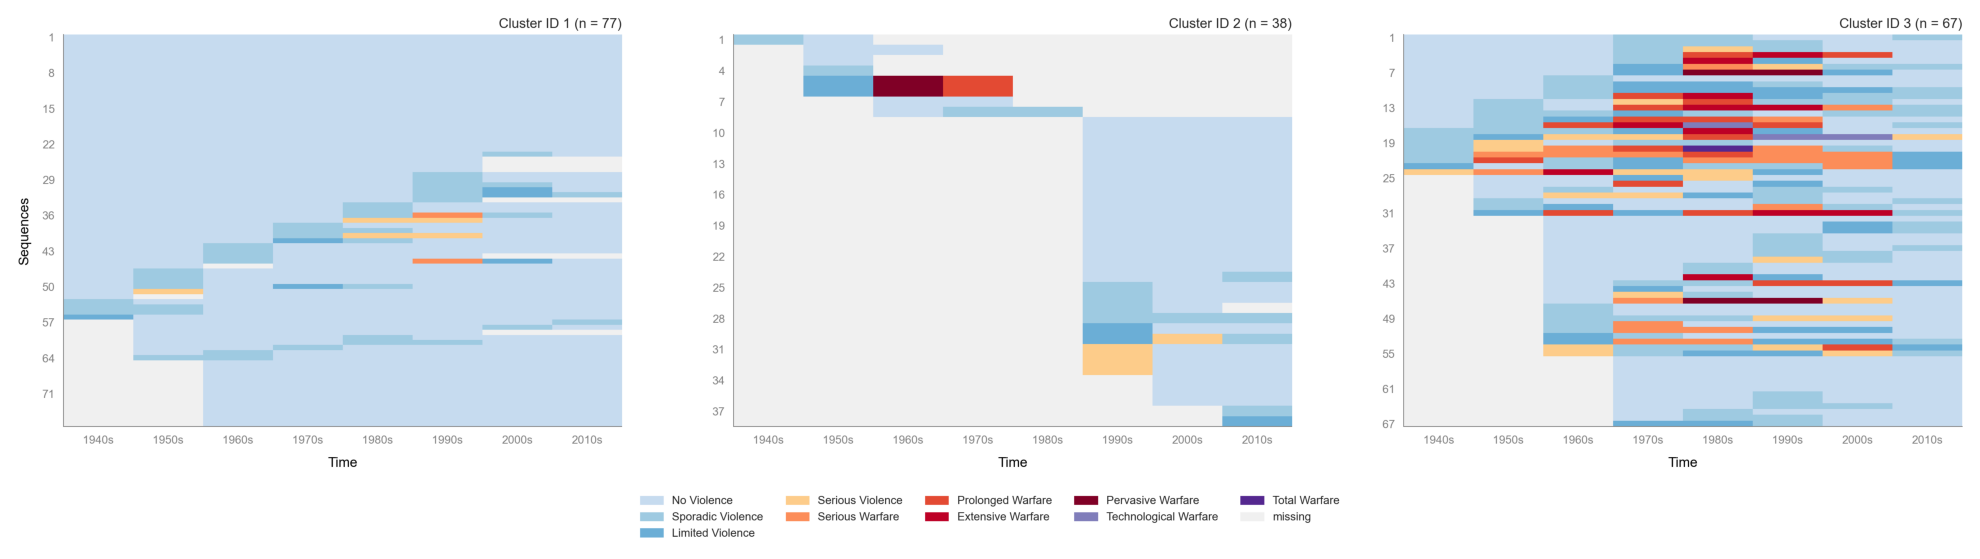

In [73]:
plot_sequence_index(seqdata=violence_sequence,
                            id_group_df=membership_table,
                            categories='Cluster ID',
                            save_as='cluster_index_intviol_plot')

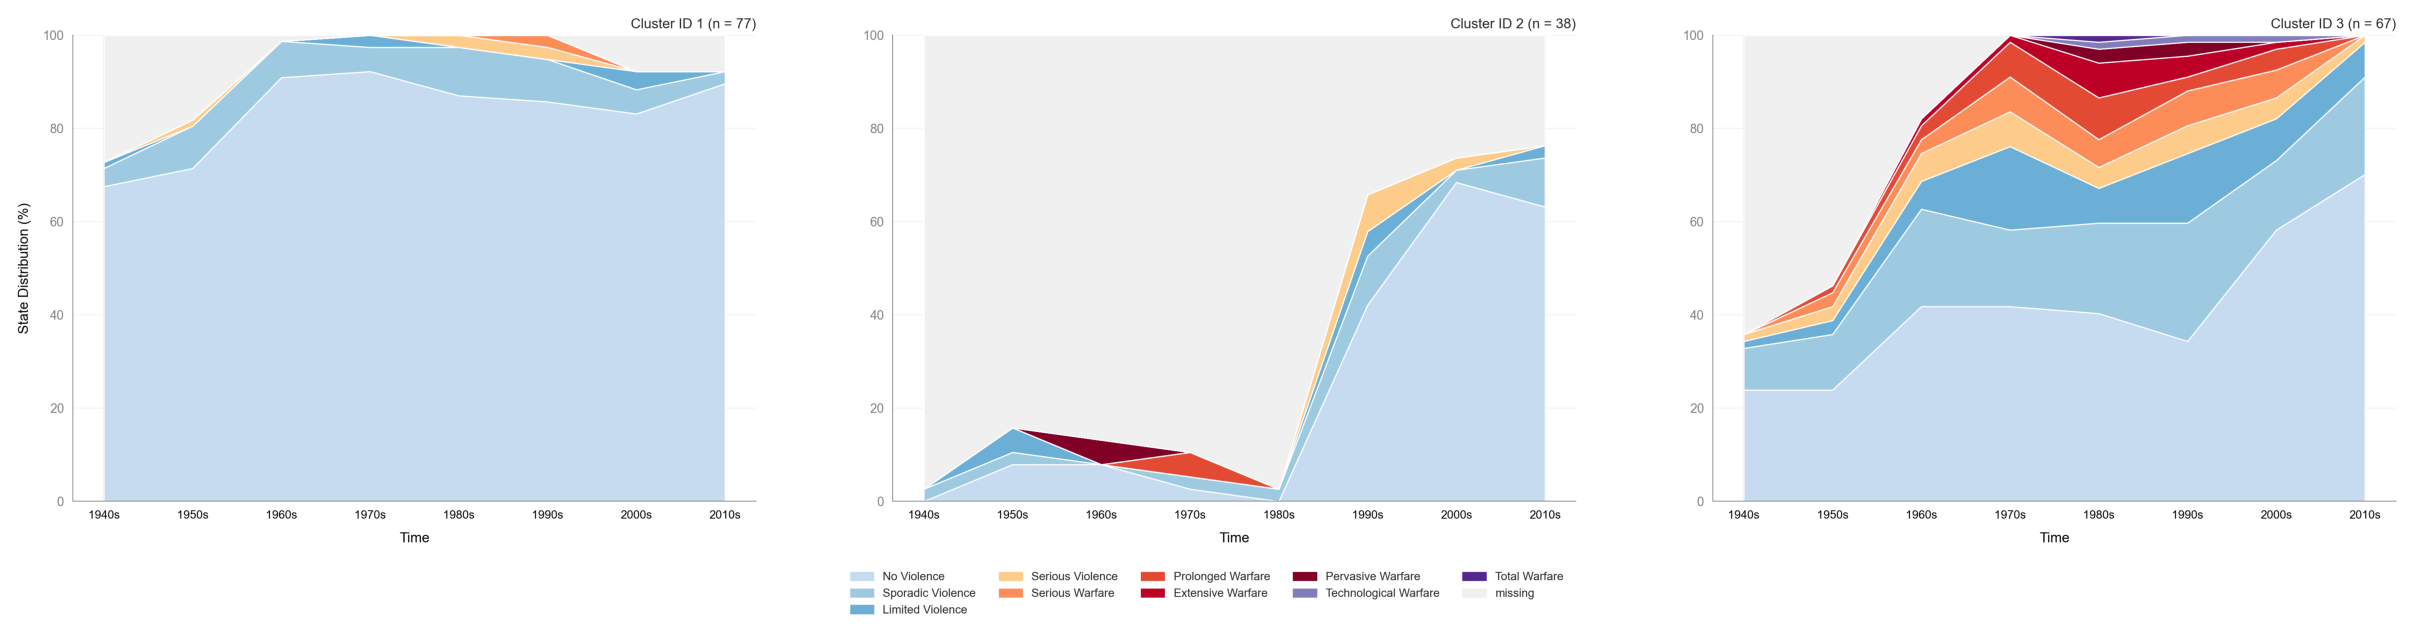

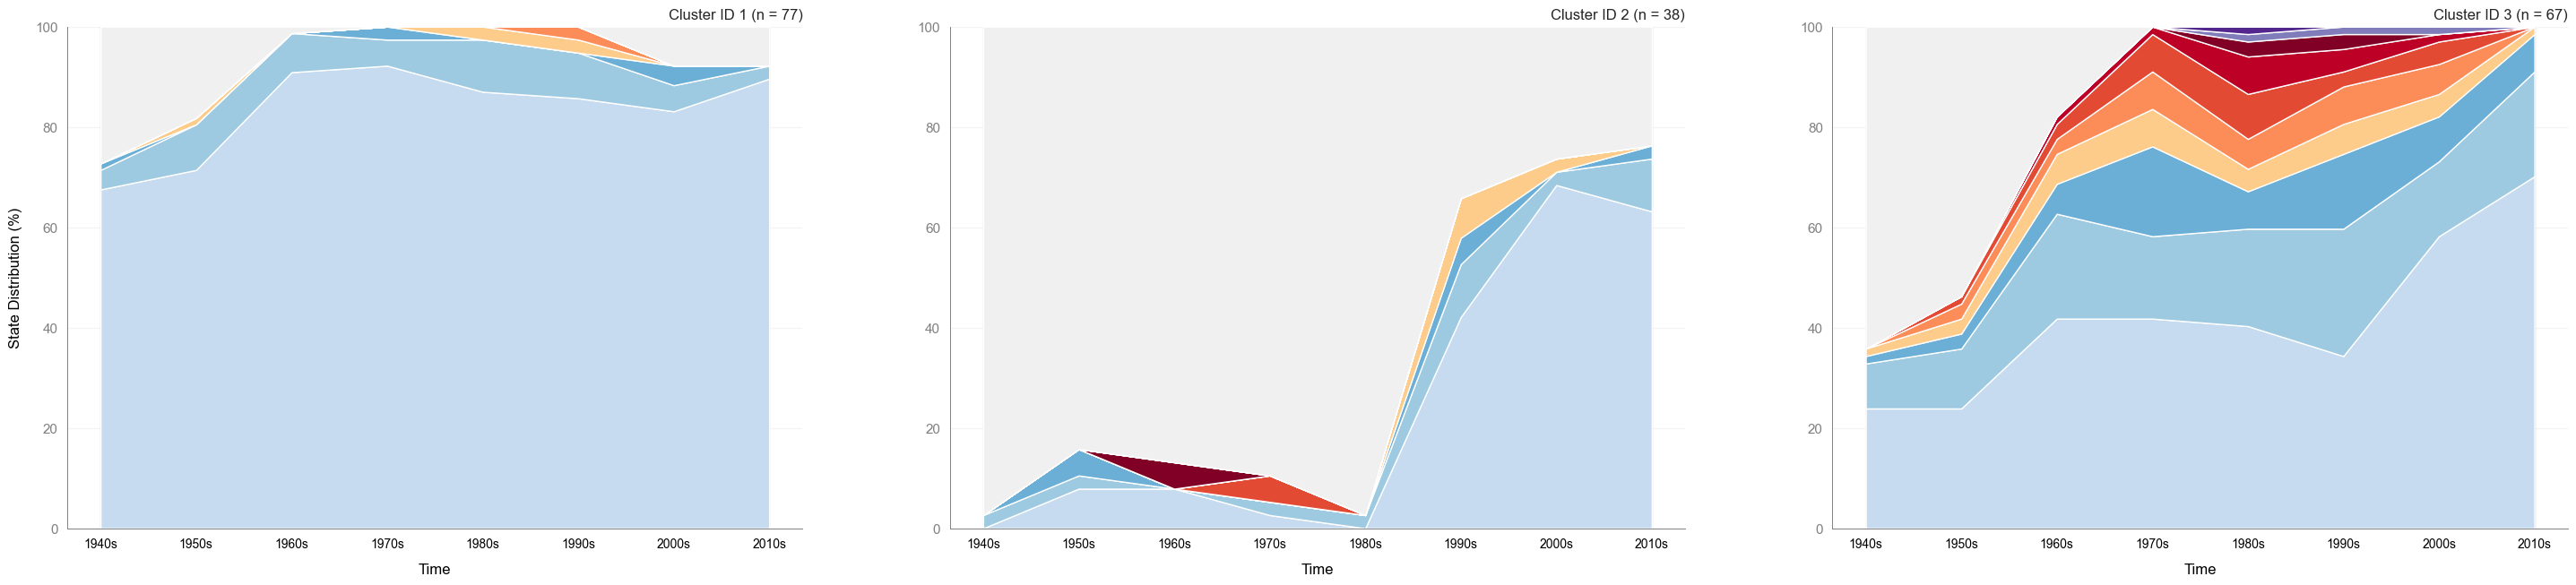

In [70]:
plot_state_distribution(seqdata=violence_sequence,
                            id_group_df=membership_table,
                            categories='Cluster ID',
                            save_as='cluster_state_distribution_intviol_plot')

## IDCD

In [12]:
wide_civil_df = long_to_wide_format_data(subset_df[['COUNTRY', 'DECADE', 'CIVTOT_CAT']],
                                         id_col='COUNTRY',
                                         time_col='DECADE',
                                         value_col='CIVTOT_CAT')

wide_civil_df

,COUNTRY,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s
0,Afghanistan,No Violence,No Violence,No Violence,Limited Violence,Pervasive Warfare,Pervasive Warfare,Limited Violence,No Violence
1,Albania,No Violence,No Violence,No Violence,No Violence,No Violence,Sporadic Violence,No Violence,No Violence
2,Algeria,No Violence,No Violence,Sporadic Violence,No Violence,No Violence,Serious Warfare,Limited Violence,No Violence
3,Angola,NaN,NaN,No Violence,Serious Warfare,Pervasive Warfare,Pervasive Warfare,Serious Violence,No Violence
4,Argentina,No Violence,Sporadic Violence,No Violence,Limited Violence,Sporadic Violence,No Violence,No Violence,No Violence
...,...,...,...,...,...,...,...,...,...
177,"Yemen, North",NaN,No Violence,No Violence,No Violence,No Violence,No Violence,NaN,NaN
178,"Yemen, South",NaN,NaN,No Violence,Sporadic Violence,Sporadic Violence,NaN,NaN,NaN
179,Yugoslavia,No Violence,No Violence,No Violence,No Violence,No Violence,No Violence,NaN,NaN
180,Zambia,NaN,NaN,Sporadic Violence,No Violence,No Violence,No Violence,No Violence,No Violence


In [23]:

common_path = '/Users/kassworkin/Library/CloudStorage/OneDrive-UniversityofIllinois-Urbana/CaliHealth/'
csv_list = [f'{common_path}/wide_civil_final_df.csv',
        f'{common_path}/wide_inter_final_df.csv']

time_cols = ['1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

# Define all possible state categories in the sequence
state_labels = [
    "No Violence", "Sporadic Violence", "Limited Violence", "Serious Violence",
    "Serious Warfare", "Prolonged Warfare", "Extensive Warfare", "Pervasive Warfare",
    "Technological Warfare", "Total Warfare"
]

seqdata = create_idcd_sequence_from_csvs(
    csv_paths=csv_list,
    time_cols=time_cols,
    time_type="year",
    id_col="COUNTRY",
    domain_state_labels=[
        {'No Violence': "No Violence",
         "Sporadic Violence": "Sporadic Violence",
         "Limited Violence": "Limited Violence",
         "Serious Violence": "Serious Violence",
         "Serious Warfare": "Serious Warfare",
         "Prolonged Warfare": "Prolonged Warfare",
         "Extensive Warfare": "Extensive Warfare",
         "Pervasive Warfare": "Pervasive Warfare",
         "Technological Warfare": "Technological Warfare",
         "Total Warfare": "Total Warfare"},
        # Pair of state-label for domain 1. e.g., for state 0, the corresponding label is "At Home"
        {'No Violence': "No Violence",
         "Sporadic Violence": "Sporadic Violence",
         "Limited Violence": "Limited Violence",
         "Serious Violence": "Serious Violence",
         "Serious Warfare": "Serious Warfare",
         "Prolonged Warfare": "Prolonged Warfare",
         "Extensive Warfare": "Extensive Warfare",
         "Pervasive Warfare": "Pervasive Warfare",
         "Technological Warfare": "Technological Warfare",
         "Total Warfare": "Total Warfare"},
    ]
)



[IDCD] Observed Combined States Frequency Table:
                                  State                                     Label  Frequency  Proportion (%)
                No Violence+No Violence                 No Violence + No Violence        764           52.47
                                nan+nan                                 nan + nan        344           23.63
          Sporadic Violence+No Violence           Sporadic Violence + No Violence        122            8.38
           Limited Violence+No Violence            Limited Violence + No Violence         43            2.95
          No Violence+Sporadic Violence           No Violence + Sporadic Violence         32            2.20
    Sporadic Violence+Sporadic Violence     Sporadic Violence + Sporadic Violence         23            1.58
           Serious Violence+No Violence            Serious Violence + No Violence         21            1.44
            Serious Warfare+No Violence             Serious Warfare + No Viole

In [21]:
plot_sequence_index(seqdata,
                    save_as='index_plot_idcd'
                    )

NameError: name 'seqdata' is not defined